In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3


In [ ]:
# DB path
db_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2040A\Final Exam\DSA_2040_Practical_Exam_Ambachow_550\Data_Warehousing\design\retail_dw.db"


### Top 10 Countries by Total Sales (Bar Chart)

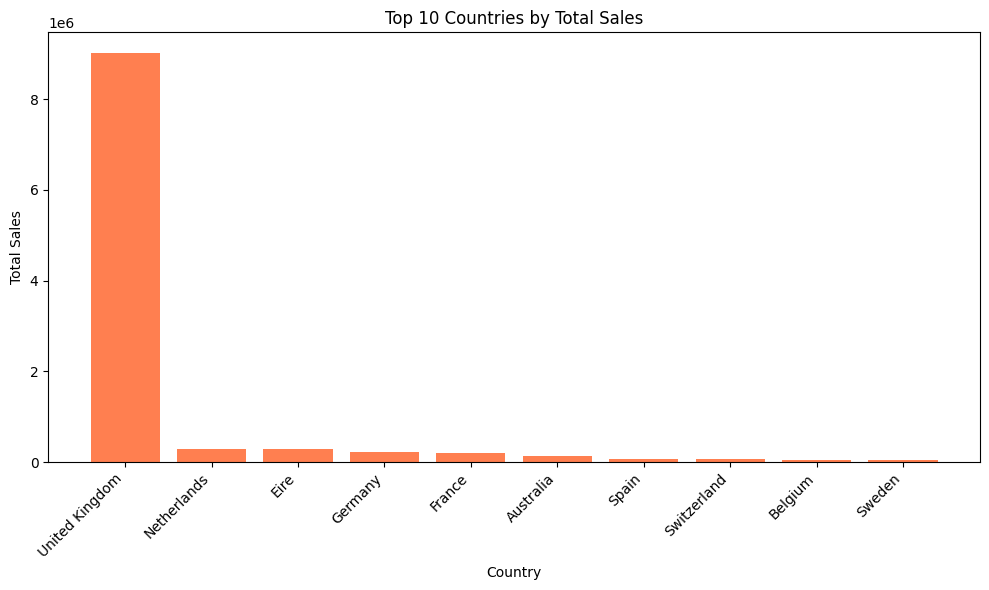

In [ ]:
# SQL query
query = """
SELECT 
    Country, 
    SUM(Quantity * UnitPrice) AS TotalSales
FROM SalesFact
GROUP BY Country
ORDER BY TotalSales DESC
LIMIT 10;
"""

# Load data
conn = sqlite3.connect(db_path)
df_top_countries = pd.read_sql_query(query, conn)
conn.close()

# Plot
plt.figure(figsize=(10,6))
plt.bar(df_top_countries['Country'], df_top_countries['TotalSales'], color='coral')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.tight_layout()

# Save image
output_image_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2040A\Final Exam\DSA_2040_Practical_Exam_Ambachow_550\Data_Warehousing\reports\top_10_countries_sales.png"
plt.savefig(output_image_path)

plt.show()


### Monthly Total sales in UK

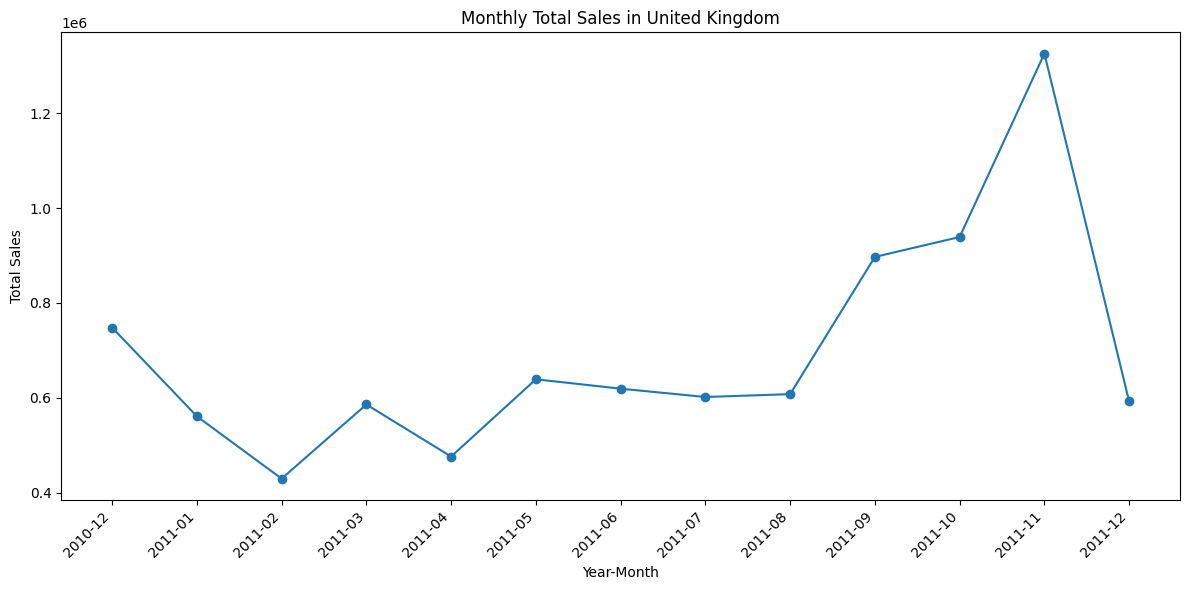

In [ ]:

# SQL query
query = """
SELECT 
    sf.InvoiceYear AS Year,
    sf.InvoiceMonth AS Month,
    (sf.Quantity * sf.UnitPrice) AS TotalSales
FROM SalesFact sf
WHERE sf.Country = 'United Kingdom'
ORDER BY sf.InvoiceYear, sf.InvoiceMonth;
"""

# Load data
conn = sqlite3.connect(db_path)
df_uk_sales = pd.read_sql_query(query, conn)
conn.close()

# Aggregate monthly sales by year and month
monthly_sales = df_uk_sales.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()

# Create a 'Year-Month' string for x-axis labels
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalSales'], marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Total Sales in United Kingdom')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.tight_layout()

# Save image
output_image_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2040A\Final Exam\DSA_2040_Practical_Exam_Ambachow_550\Data_Warehousing\reports\uk_monthly_sales.png"
plt.savefig(output_image_path)

plt.show()


### Sales Distrubtion By Year


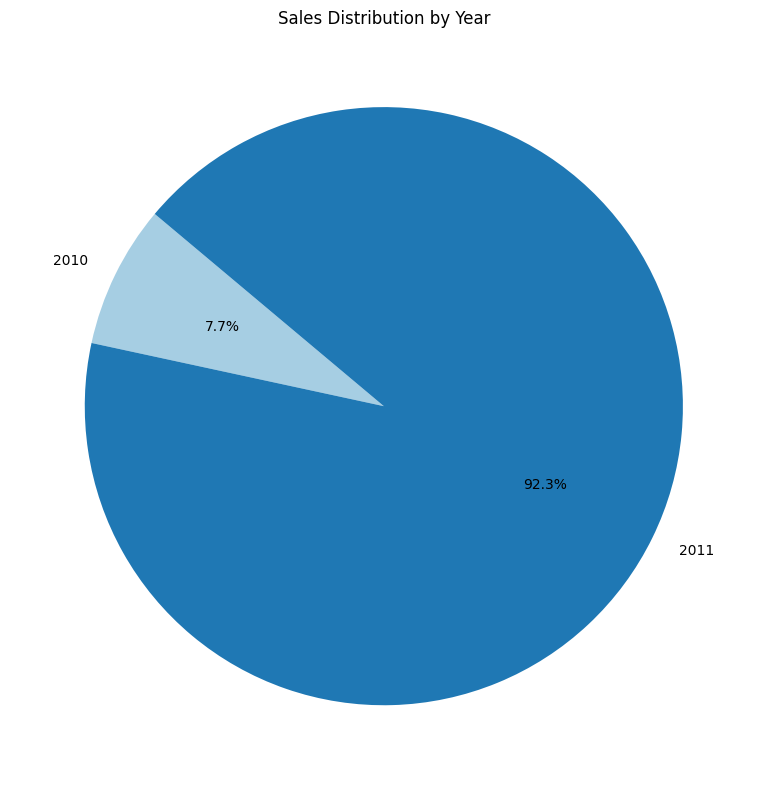

In [ ]:
# SQL query to get total sales per invoice year
query = """
SELECT 
    InvoiceYear, 
    SUM(Quantity * UnitPrice) AS TotalSales
FROM SalesFact
GROUP BY InvoiceYear
ORDER BY InvoiceYear;
"""

# Connect and fetch data
conn = sqlite3.connect(db_path)
df_year_sales = pd.read_sql_query(query, conn)
conn.close()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_year_sales['TotalSales'], 
        labels=df_year_sales['InvoiceYear'].astype(str), 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Year')
plt.tight_layout()

# Save the pie chart image
output_image_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2040A\Final Exam\DSA_2040_Practical_Exam_Ambachow_550\Data_Warehousing\reports\sales_distribution_by_year.png"
plt.savefig(output_image_path)

plt.show()
